DATA ANALYTICS – IBM PROJECT
Why do workers resign from the positions they hold? Can employee attrition be 
anticipated? Can companies take steps to prevent high employee turn-over?
Employee attrition is the reduction of staff by voluntary or involuntary reasons. 
These can be through natural means like retirement, or it can be through 
resignation, termination of contract, or when a company decides to make a position 
redundant. Excessive involuntary attrition can be detrimental to the overall 
business goals, and can lead to understaffing, increased job burden on remaining 
employees, and harmful consequences to company reputation. 
You’ve just been hired by IBM to work in their Data Analytics sector. On your second 
day, you are given a dataset from HR that includes several records of employees 
that were with the company in the prior calendar year. Since the development of 
the dataset, some of those employees have since resigned from their positions. The 
company was surprised with the recent level of turnover and have tasked you with 
digging into the data to determine any insights about what leads to employee 
turnover, and alternatively, what aspects of the jobs can be protected to reduce 
employee turnover. 
Using the ‘IBM Employee Attrition’ dataset – your role is to comprehensively 
explore the data and generate meaningful insights into what the data is presenting. 
You should conclude your assignment with 3 recommendations you will make to the 
HR department regarding employee attrition. 
At the least, you should complete the following tasks:
 Data prep and cleaning – prior to exploring the data, you should ensure 
that the dataset is clean, all variables are in their proper format, and the data 
is free of missing, abnormal, or outlier values. 
 Exploratory data analysis – you should explore every aspect of the data to 
determine the features of the data, the range of values for all variables of 
interest, and the relationships between variables. Exploration should be 
conducted outside of predictive modeling – in other words, you are not only 
interested in how the dependent and independent variables interact – you 
should also spend some time exploring variations in the data among 
variables (i.e. how does salary differ between genders? Does time spent in 
the company differ by job role?)
 Modeling – after thoroughly exploring the data, create a logistic regression 
model that predicts employee attrition based on the other variables available 
to you. Clearly interpret your model findings. Re-run/tweak your model if you 
think you can find a better fit. 
 Visualization – Create at least 3 visualizations that highlight some of the 
most interesting findings in your dataset. These can be findings from the 
regression model or any interesting relationships between variables. 
Good luck!

In [12]:
import pandas as pd
import numpy as np

################ include this code when importing your libraries 

pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

################

df = pd.read_excel("IBM Employee Attrition.xlsx")

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


Data prep and cleaning – prior to exploring the data, you should ensure 
that the dataset is clean, all variables are in their proper format, and the data 
is free of missing, abnormal, or outlier values. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [14]:
df.isnull().sum() ## there are no missing data

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

##Using z-scores to detect and remove outliers

In [15]:
df = pd.read_excel("IBM Employee Attrition.xlsx")

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [17]:
## Create a copy of your dataset to filter outliers
dfz = df.copy()

## Check original shape of the dataset
print(dfz.shape)

(1470, 30)


In [28]:
## To determine absolute value of z-score -- np.abs(data/function/options)

dfz["zscore_salary"] = np.abs(stats.zscore(dfz["Salary"]))
dfz["zscore_Age"] = np.abs(stats.zscore(dfz["Age"]))
dfz["zscore_Attrition"] = np.abs(stats.zscore(dfz["Attrition"]))
dfz["zscore_DistanceFromHome"] = np.abs(stats.zscore(dfz["DistanceFromHome"]))
dfz["zscore_EmployeeNumber"] = np.abs(stats.zscore(dfz["EmployeeNumber"]))
dfz["zscore_EnvironmentSatisfaction"] = np.abs(stats.zscore(dfz["EnvironmentSatisfaction"]))

## Preview new column; optional
dfz.head()

In [34]:
# What information can we find at these index locations?

dfz.iloc[[1, 28]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
28,44,No,Travel_Rarely,Research & Development,7,4,Medical,36,1,Female,2,3,Healthcare Representative,4,Married,10248,3,Y,No,14,3,4,1,24,4,3,22,6,5,17


 Exploratory data analysis

In [39]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [44]:
df["Age"].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Determine Frequencies of Groups

In [51]:

## Frequencies 
## Relative Frequencies 
df["Attrition"].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

In [49]:
## Multi-variable Frequencies 
df["Gender"].value_counts(normalize=True)


Male      0.6
Female    0.4
Name: Gender, dtype: float64

Relationships between Variables

In [53]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.mode()

Relationships between Variables

In [58]:
pd.crosstab(df["Gender"], df["BusinessTravel"], margins=True, normalize=True)

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely,All
Gender,,,,
Female,0.033333,0.079592,0.287075,0.4
Male,0.068707,0.108844,0.422449,0.6
All,0.102041,0.188435,0.709524,1.0


In [59]:
df["Age"].groupby(df["Education"]).mean()

Education
1    32.164706
2    36.861702
3    36.479021
4    39.281407
5    39.895833
Name: Age, dtype: float64

 Modeling

In [60]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [61]:
df = pd.read_excel("IBM Employee Attrition.xlsx")

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.info()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='Age'>

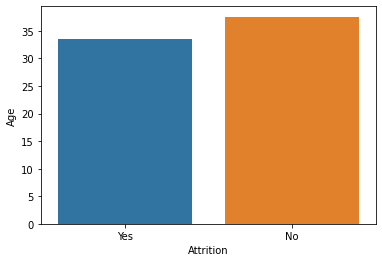

In [62]:
print(df["Age"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "Age", ci = None)

Preparing the Logistic Regression Model

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

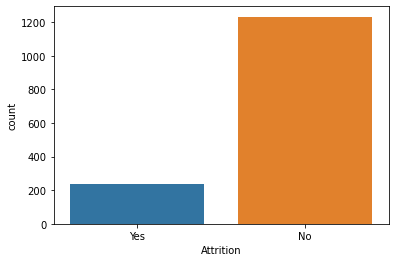

In [64]:
## check the coding of the dependent variable
## the value coded as "1" should represent to the presence of the event

###

print(df["Age"].value_counts())

###

sns.countplot(data = df, x = "Attrition")

The Logistic Regression Model

In [81]:
## creating the model is VERY similar to a linear regression model
## include "logit" instead of "ols"

mod1 = sm.logit('Attrition ~ Age + Education + Gender + JobSatisfaction + MonthlyIncome + OverTime + TotalWorkingYears + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion', data=df).fit()

mod1.summary()

In [82]:
##Logistic Regression Model Results
## print just the variable coefficient values

mod1.params

In [84]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

 Visualization

Text(0.5, 1.0, 'MaritalStatus by RelationshipSatisfaction')

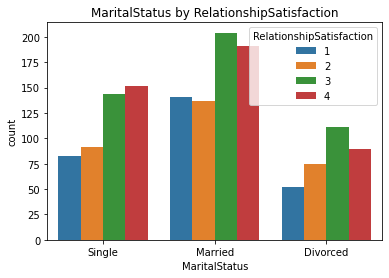

In [95]:
## MaritalStatus by RelationshipSatisfaction

sns.countplot(data = df, x = "MaritalStatus", hue = "RelationshipSatisfaction")
plt.title('MaritalStatus by RelationshipSatisfaction')


Text(0.5, 1.0, 'TotalWorkingYears by WorkLifeBalance')

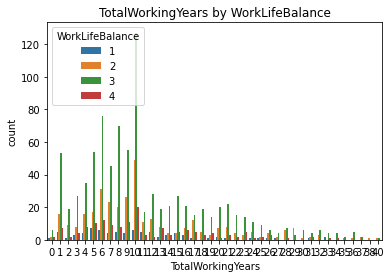

In [104]:
## TotalWorkingYears by WorkLifeBalance

sns.countplot(data = df, x = "TotalWorkingYears", hue = "WorkLifeBalance")
plt.title('TotalWorkingYears by WorkLifeBalance')

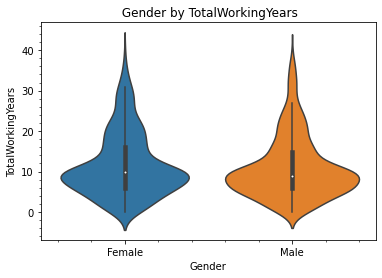

In [110]:
# Create a violin plot to show Gender by TotalWorkingYears

sns.violinplot(x = df["Gender"], y = df["TotalWorkingYears"])
plt.title(' Gender by TotalWorkingYears')
plt.minorticks_on() 